Форма данных: (73718, 6)
Пропущенные значения:
 Year                  0
Month                 0
Day                   0
Number of Sunspots    0
Standard Deviation    0
Observations          0
dtype: int64

Статистика по числовым признакам:
                Year         Month           Day  Number of Sunspots  \
count  73718.000000  73718.000000  73718.000000        73718.000000   
mean    1918.416750      6.518896     15.729347           79.248732   
std       58.264401      3.447114      8.800032           77.470942   
min     1818.000000      1.000000      1.000000           -1.000000   
25%     1868.000000      4.000000      8.000000           15.000000   
50%     1918.000000      7.000000     16.000000           58.000000   
75%     1969.000000     10.000000     23.000000          125.000000   
max     2019.000000     12.000000     31.000000          528.000000   

       Standard Deviation  Observations  
count        73718.000000  73718.000000  
mean             6.924587      4.42

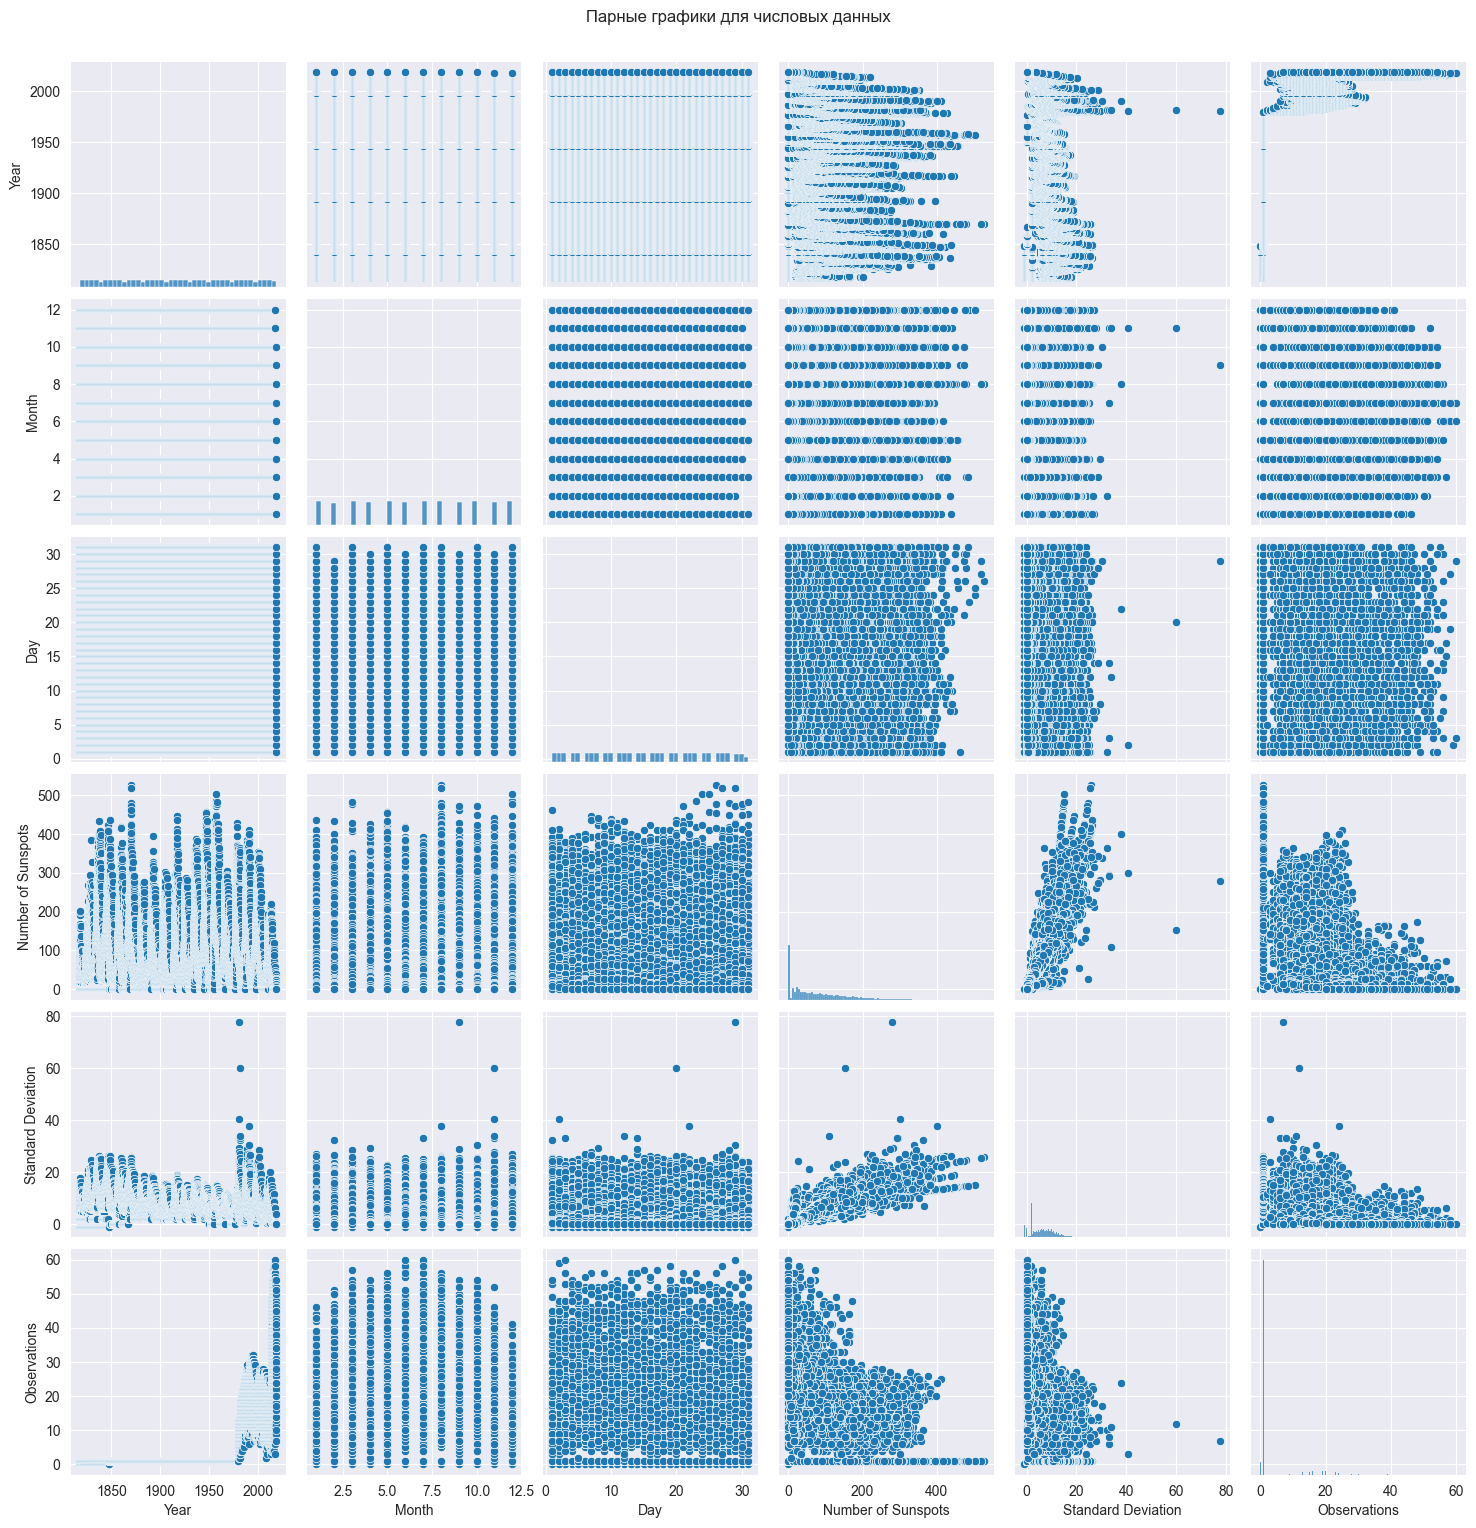

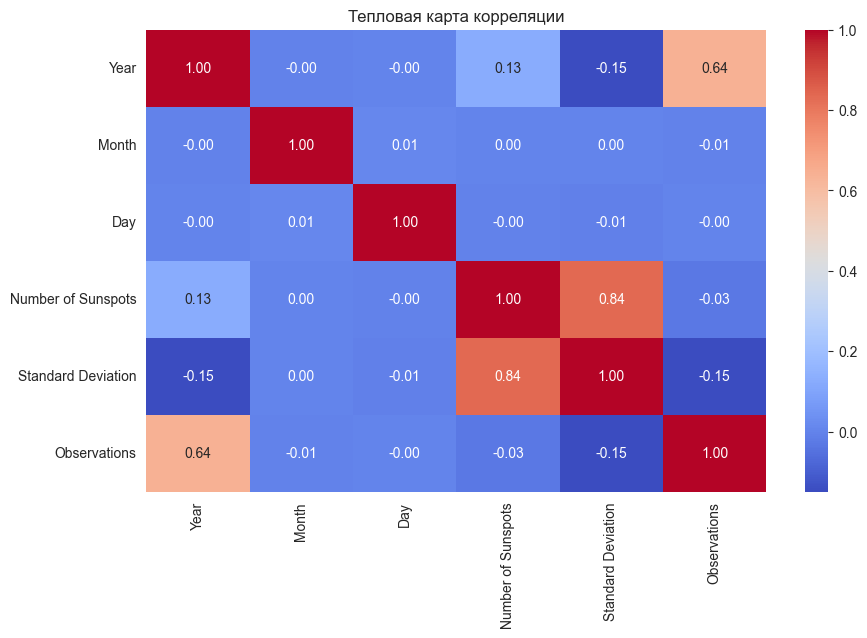

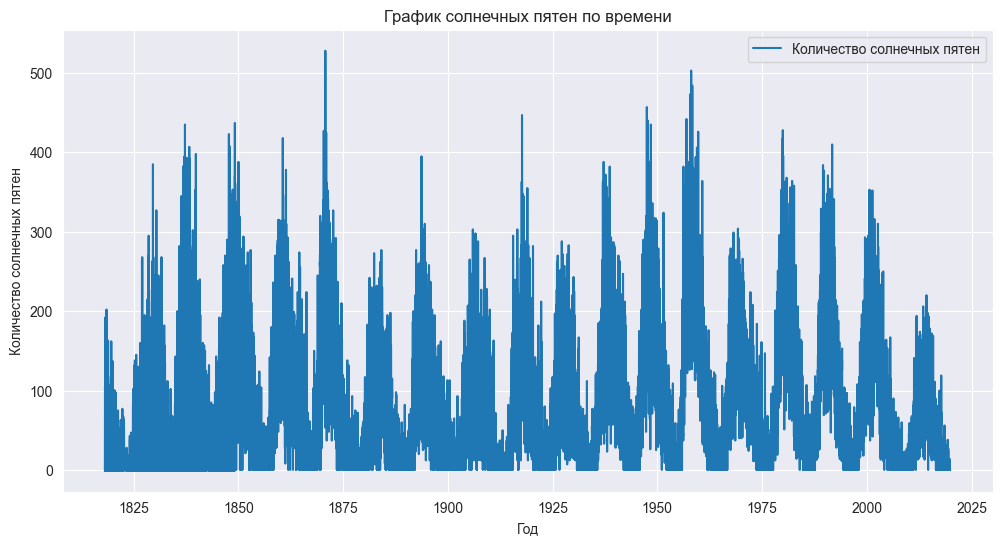

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV-файла
file_path = 'sunspot_data.csv'
data = pd.read_csv(file_path)

# Разделение данных на столбцы, используя символ ';' как разделитель
data_split = data.iloc[:, 0].str.split(';', expand=True)

# Назначение имен столбцов
data_split.columns = ['Year', 'Month', 'Day', 'Number of Sunspots', 'Standard Deviation', 'Observations']

# Преобразование данных в числовой формат (если возможно)
for col in ['Year', 'Month', 'Day', 'Number of Sunspots', 'Standard Deviation', 'Observations']:
    data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

# Анализ структуры данных
print("Форма данных:", data_split.shape)
print("Пропущенные значения:\n", data_split.isnull().sum())
print("\nСтатистика по числовым признакам:\n", data_split.describe())

# Визуализация данных
# Построение парных графиков для числовых данных
numeric_columns = data_split.select_dtypes(include=[np.number]).columns.tolist()
sns.pairplot(data_split[numeric_columns].dropna())
plt.suptitle('Парные графики для числовых данных', y=1.02)
plt.show()

# Построение тепловой карты корреляции
plt.figure(figsize=(10, 6))
sns.heatmap(data_split[numeric_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Тепловая карта корреляции")
plt.show()

# Визуализация временного ряда для количества солнечных пятен (если есть столбцы времени)
plt.figure(figsize=(12, 6))
plt.plot(data_split['Year'] + data_split['Month'] / 12 + data_split['Day'] / 365, data_split['Number of Sunspots'], label='Количество солнечных пятен')
plt.xlabel("Год")
plt.ylabel("Количество солнечных пятен")
plt.title("График солнечных пятен по времени")
plt.legend()
plt.show()


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Загрузка и предварительная обработка данных
file_path = 'sunspot_data.csv'
data = pd.read_csv(file_path)

# Разделение данных на столбцы, используя символ ';' как разделитель
data_split = data.iloc[:, 0].str.split(';', expand=True)
data_split.columns = ['Year', 'Month', 'Day', 'Number of Sunspots', 'Standard Deviation', 'Observations']

# Преобразование данных в числовой формат (если возможно)
for col in ['Year', 'Month', 'Day', 'Number of Sunspots', 'Standard Deviation', 'Observations']:
    data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

# Удаление строк с пропущенными значениями
data_split.dropna(inplace=True)

# Подготовка данных для классификации
# Создаем целевую переменную на основе некоторого условия (пример: большое или маленькое число солнечных пятен)
data_split['Target'] = (data_split['Number of Sunspots'] > data_split['Number of Sunspots'].median()).astype(int)

X = data_split[['Year', 'Month', 'Day', 'Standard Deviation', 'Observations']]
y = data_split['Target']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2.1 Построение классификатора с заданным K
k = 5  # количество ближайших соседей
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"Точность классификатора при K={k}: {accuracy_score(y_test, y_pred):.2f}")

Точность классификатора при K=5: 0.95


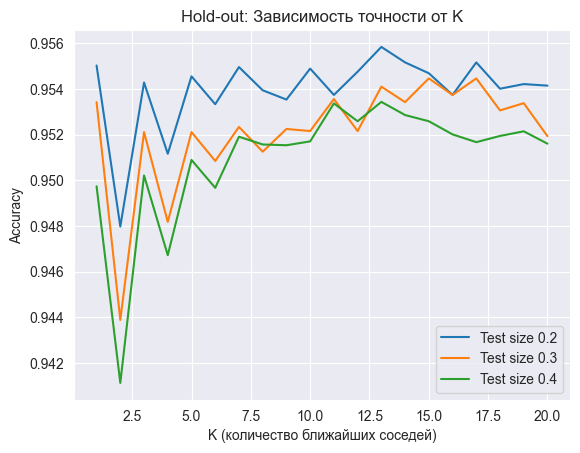

In [3]:
# 2.2 Оценка hold-out для различных значений K и соотношений подвыборок
k_values = range(1, 21)
test_sizes = [0.2, 0.3, 0.4]
holdout_results = {}

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    holdout_results[test_size] = accuracies

# Визуализация результатов hold-out
for test_size, accuracies in holdout_results.items():
    plt.plot(k_values, accuracies, label=f"Test size {test_size}")

plt.xlabel("K (количество ближайших соседей)")
plt.ylabel("Accuracy")
plt.title("Hold-out: Зависимость точности от K")
plt.legend()
plt.show()


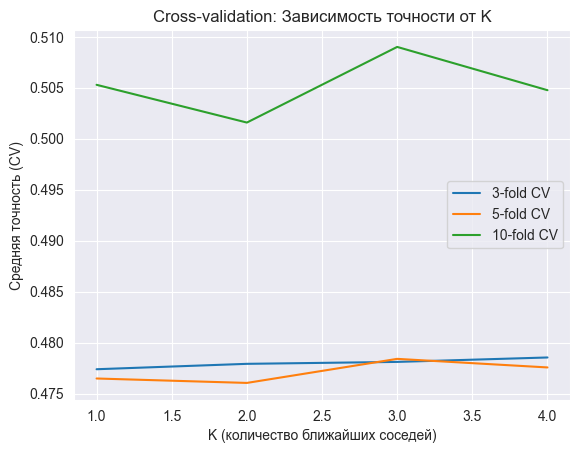

In [4]:
# 2.3 Оценка cross-validation для различных значений K
fold_values = [3, 5, 10]
cv_results = {}

k_values = range(1, 5)
for fold in fold_values:
    accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=fold)
        accuracies.append(np.mean(scores))
    cv_results[fold] = accuracies

# Визуализация результатов cross-validation
for fold, accuracies in cv_results.items():
    plt.plot(k_values, accuracies, label=f"{fold}-fold CV")

plt.xlabel("K (количество ближайших соседей)")
plt.ylabel("Средняя точность (CV)")
plt.title("Cross-validation: Зависимость точности от K")
plt.legend()
plt.show()

In [5]:
# 2.4 Вычисление оптимального значения K
optimal_k = max(range(1, 21), key=lambda k: np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=5)))
print(f"Оптимальное значение K по 5-fold CV: {optimal_k}")

# Демонстрация работы оптимального классификатора
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)
print(f"Точность оптимального классификатора (K={optimal_k}): {accuracy_score(y_test, y_pred_optimal):.2f}")

# Демонстрация на новом объекте
new_object = pd.DataFrame({
    'Year': [2023],
    'Month': [5],
    'Day': [15],
    'Standard Deviation': [8.0],
    'Observations': [10]
})

# Предсказание для нового объекта
prediction = knn_optimal.predict(new_object)
print(f"Предсказание для нового объекта {new_object.values.tolist()[0]}: {'Много солнечных пятен' if prediction[0] == 1 else 'Мало солнечных пятен'}")

Оптимальное значение K по 5-fold CV: 7
Точность оптимального классификатора (K=7): 0.95
Предсказание для нового объекта [2023.0, 5.0, 15.0, 8.0, 10.0]: Мало солнечных пятен


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import graphviz

# Загрузка и предварительная обработка данных
file_path = 'sunspot_data.csv'
data = pd.read_csv(file_path)

# Разделение данных на столбцы, используя символ ';' как разделитель
data_split = data.iloc[:, 0].str.split(';', expand=True)
data_split.columns = ['Year', 'Month', 'Day', 'Number of Sunspots', 'Standard Deviation', 'Observations']

# Преобразование данных в числовой формат (если возможно)
data_split = data_split.apply(pd.to_numeric, errors='coerce')

# Удаление строк с пропущенными значениями
data_split.dropna(inplace=True)

# Создание целевой переменной
data_split['Target'] = (data_split['Number of Sunspots'] > data_split['Number of Sunspots'].median()).astype(int)

X = data_split[['Year', 'Month', 'Day', 'Standard Deviation', 'Observations']]
y = data_split['Target']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2.1 Построение дерева классификации
max_depth = 5
max_features = 3
tree_clf = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, random_state=42)
tree_clf.fit(X_train, y_train)

# Визуализация дерева решений и сохранение в формате PNG
export_graphviz(
    tree_clf,
    out_file="tree.dot",
    feature_names=X.columns,
    class_names=["Low Sunspots", "High Sunspots"],
    rounded=True,
    filled=True
)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render("decision_tree", format="png", cleanup=True)

print("Дерево решений сохранено в файле 'decision_tree.png'.")

Дерево решений сохранено в файле 'decision_tree.png'.


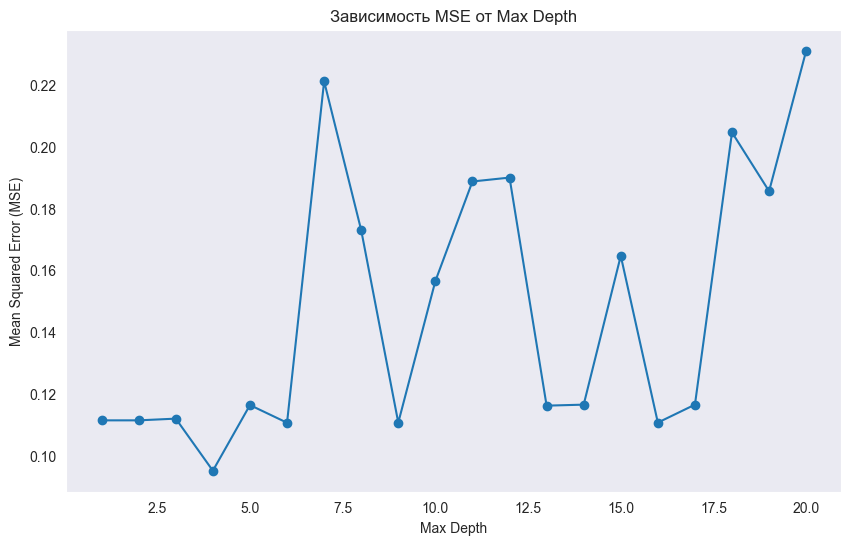

In [7]:
# 2.2 Оценка cross validation (MSE) для различных значений max_depth
depths = range(1, 21)
mse_depth = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, max_features=max_features, random_state=42)
    scores = cross_val_score(tree, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_depth.append(-scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(depths, mse_depth, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Зависимость MSE от Max Depth")
plt.grid()
plt.show()

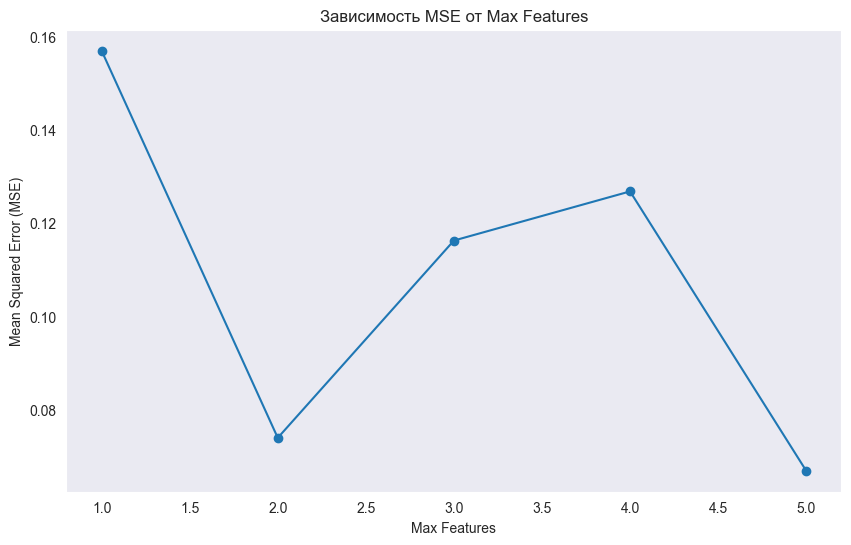

In [8]:
# 2.3 Оценка cross validation (MSE) для различных значений max_features
features_range = range(1, X.shape[1] + 1)
mse_features = []

for features in features_range:
    tree = DecisionTreeClassifier(max_depth=max_depth, max_features=features, random_state=42)
    scores = cross_val_score(tree, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_features.append(-scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(features_range, mse_features, marker='o')
plt.xlabel("Max Features")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Зависимость MSE от Max Features")
plt.grid()
plt.show()


In [13]:
# 2.4 Оптимальные значения max_depth и max_features
optimal_depth = depths[np.argmin(mse_depth)]
optimal_features = features_range[np.argmin(mse_features)]

print(f"Оптимальное значение Max Depth: {optimal_depth}")
print(f"Оптимальное значение Max Features: {optimal_features}")

# Построение классификатора с оптимальными параметрами
optimal_tree = DecisionTreeClassifier(max_depth=optimal_depth, max_features=optimal_features, random_state=42)
optimal_tree.fit(X_train, y_train)

# Визуализация дерева (не нужна)
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree
# 
# plt.figure(figsize=(20,10))
# plot_tree(optimal_tree,
#           filled=True,
#           feature_names=X_train.columns,   # замените на реальные имена признаков, если есть
#           class_names=["Class 0", "Class 1"],  # замените на ваши классы
#           fontsize=10)
# plt.title("Optimal Decision Tree (max_depth=4, max_features=5)")
# plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
# plt.show()


Оптимальное значение Max Depth: 4
Оптимальное значение Max Features: 5


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,5
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
# 2.5 Визуализация дерева с оптимальными параметрами
export_graphviz(
    optimal_tree,
    out_file="optimal_tree.dot",
    feature_names=X.columns,
    class_names=["Low Sunspots", "High Sunspots"],
    rounded=True,
    filled=True
)
with open("optimal_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render("optimal_decision_tree", format="png", cleanup=True)

print("Оптимальное дерево решений сохранено в файле 'optimal_decision_tree.png'.")

Оптимальное дерево решений сохранено в файле 'optimal_decision_tree.png'.


<Figure size 1000x600 with 0 Axes>

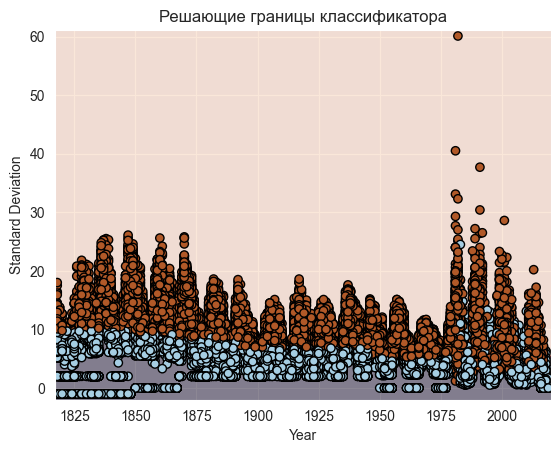

In [11]:
# 2.6 Визуализация решающих границ
# Используем два признака из X_train для визуализации (например, 'Year' и 'Standard Deviation')
features_for_visualization = ['Year', 'Standard Deviation']

# Обучение модели с учетом выбранных признаков
optimal_tree_visualization = DecisionTreeClassifier(max_depth=optimal_depth, max_features=len(features_for_visualization), random_state=42)
optimal_tree_visualization.fit(X_train[features_for_visualization], y_train)

# Построение решающих границ
plt.figure(figsize=(10, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    optimal_tree_visualization,
    X_train[features_for_visualization],
    response_method="predict",
    alpha=0.5,
    xlabel=features_for_visualization[0],
    ylabel=features_for_visualization[1]
)
plt.scatter(X_train[features_for_visualization[0]], X_train[features_for_visualization[1]], c=y_train, edgecolor="k", cmap=plt.cm.Paired)
plt.title("Решающие границы классификатора")
plt.show()